In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
%pylab inline
import json

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [133]:
col_names = ["unit", "time", "OpSet1", "OpSet2", "OpSet3"]
for i in xrange(1,24):
    col_names.append("SensorMeasure" + str(i))

In [134]:
allFiles = ["../data/CMAPSSData/train_FD001.txt", "../data/CMAPSSData/train_FD002.txt", "../data/CMAPSSData/train_FD003.txt", "../data/CMAPSSData/train_FD004.txt", \
            "../data/CMAPSSData/test_FD001.txt", "../data/CMAPSSData/test_FD002.txt", "../data/CMAPSSData/test_FD003.txt", "../data/CMAPSSData/test_FD004.txt"]
file_suffixes = ["_train_FD001", "_train_FD002", "_train_FD003", "_train_FD004", "_test_FD001", "_test_FD002", \
               "_test_FD003", "_test_FD004"]
dfs = []
total = 0
for i in xrange(len(allFiles)):
    temp_df = pd.read_csv(allFiles[i], header=None, sep = ' ', index_col=False)
    temp_df[0] =  temp_df[0].astype(str) + file_suffixes[i]
    temp_df.columns = col_names
    temp_df.drop(['SensorMeasure22', "SensorMeasure23"], axis=1, inplace=True)
    dfs.append(temp_df)
    total += len(temp_df)
all_dfs = pd.concat(dfs, ignore_index=True)
all_dfs.columns = col_names[:26]

Min is 19
Avg is 187
Max is 543
Std is 82


(array([ 118.,  171.,  356.,  406.,  201.,   86.,   50.,   15.,    9.,    4.]),
 array([   38. ,   142.8,   247.6,   352.4,   457.2,   562. ,   666.8,
          771.6,   876.4,   981.2,  1086. ]),
 <a list of 10 Patch objects>)

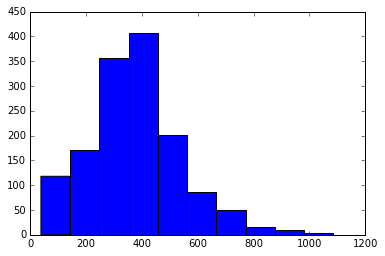

In [135]:
print "Min is %d" %min(all_dfs.groupby(["unit"])["time"].count())
print "Avg is %d" %np.mean(all_dfs.groupby(["unit"])["time"].count())
print "Max is %d" %max(all_dfs.groupby(["unit"])["time"].count())
print "Std is %d" %np.std(all_dfs.groupby(["unit"])["time"].count())
plt.hist(df.groupby(["unit"])["time"].count())

Min is 128
Avg is 206
Max is 362
Std is 46


(array([ 118.,  171.,  356.,  406.,  201.,   86.,   50.,   15.,    9.,    4.]),
 array([   38. ,   142.8,   247.6,   352.4,   457.2,   562. ,   666.8,
          771.6,   876.4,   981.2,  1086. ]),
 <a list of 10 Patch objects>)

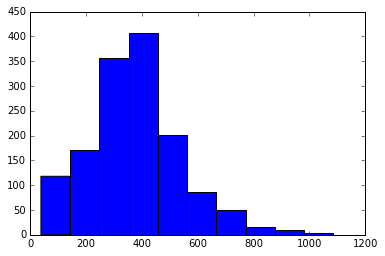

In [155]:
print "Min is %d" %min(dfs[0].groupby(["unit"])["time"].count())
print "Avg is %d" %np.mean(dfs[0].groupby(["unit"])["time"].count())
print "Max is %d" %max(dfs[0].groupby(["unit"])["time"].count())
print "Std is %d" %np.std(dfs[0].groupby(["unit"])["time"].count())
plt.hist(df.groupby(["unit"])["time"].count())

In [136]:
len(all_dfs)

265256

#### Count of Null Values in the dataframe

In [137]:
sum([df[i].isnull().sum() for i in df.columns])

0

## Functions for time series trending of Sensors and Operational Settings column

#### Time series graph of the 3 operational settings columns from 4 random machines

In [138]:
def operational_settings_time_series(df, machines, label):

    fig, axes = plt.subplots(figsize=(10,10), nrows=3, ncols=1)
    for i in xrange(0,3):
        col_name = "OpSet" + str(i+1)
        axes[i].plot(df[df['unit'] == str(machines[0])]['time'], df[df['unit'] == str(machines[0])][col_name], 'b') 
        axes[i].plot(df[df['unit'] == str(machines[1])]['time'], df[df['unit'] == str(machines[1])][col_name], 'r')
        axes[i].plot(df[df['unit'] == str(machines[2])]['time'], df[df['unit'] == str(machines[2])][col_name], 'g')
        axes[i].plot(df[df['unit'] == str(machines[3])]['time'], df[df['unit'] == str(machines[3])][col_name], 'y')
        axes[i].set_xlabel("time")
        axes[i].set_ylabel(col_name)
    fig_name = "operational_settings_" + label + ".png"
    plt.savefig(fig_name)

#### Time series graph of sensor measurements from 4 random machines

In [139]:
def sensors_time_series(df, machines):

    fig, axes = plt.subplots(figsize=(12,12), nrows=7, ncols=1, sharex=True)

    for i in xrange(7):
        col_name = "SensorMeasure" + str(i+1)
        axes[i].plot(df[df['unit'] == str(machines[0])]['time'], df[df['unit'] == str(machines[0])][col_name], 'b') 
        axes[i].plot(df[df['unit'] == str(machines[1])]['time'], df[df['unit'] == str(machines[1])][col_name], 'r')
        axes[i].plot(df[df['unit'] == str(machines[2])]['time'], df[df['unit'] == str(machines[2])][col_name], 'g')
        axes[i].plot(df[df['unit'] == str(machines[3])]['time'], df[df['unit'] == str(machines[3])][col_name], 'y')
        axes[i].set_ylabel("sensor_" + str(i+1))
    
    

    fig, axes = plt.subplots(figsize=(12,12), nrows=7, ncols=1, sharex=True)

    for i in xrange(7,14):
        col_name = "SensorMeasure" + str(i+1)
        axes[i-7].plot(df[df['unit'] == str(machines[0])]['time'], df[df['unit'] == str(machines[0])][col_name], 'b') 
        axes[i-7].plot(df[df['unit'] == str(machines[1])]['time'], df[df['unit'] == str(machines[1])][col_name], 'r')
        axes[i-7].plot(df[df['unit'] == str(machines[2])]['time'], df[df['unit'] == str(machines[2])][col_name], 'g')
        axes[i-7].plot(df[df['unit'] == str(machines[3])]['time'], df[df['unit'] == str(machines[3])][col_name], 'y')
        axes[i-7].set_ylabel("sensor_" + str(i+1))

    fig, axes = plt.subplots(figsize=(12,12), nrows=7, ncols=1, sharex=True)

    for i in xrange(14,21):
        col_name = "SensorMeasure" + str(i+1)
        axes[i-14].plot(df[df['unit'] == str(machines[0])]['time'], df[df['unit'] == str(machines[0])][col_name], 'b') 
        axes[i-14].plot(df[df['unit'] == str(machines[1])]['time'], df[df['unit'] == str(machines[1])][col_name], 'r')
        axes[i-14].plot(df[df['unit'] == str(machines[2])]['time'], df[df['unit'] == str(machines[2])][col_name], 'g')
        axes[i-14].plot(df[df['unit'] == str(machines[3])]['time'], df[df['unit'] == str(machines[3])][col_name], 'y')
        axes[i-14].set_ylabel("sensor_" + str(i+1))


['58_test_FD003', '205_train_FD002', '224_train_FD002', '106_test_FD004']


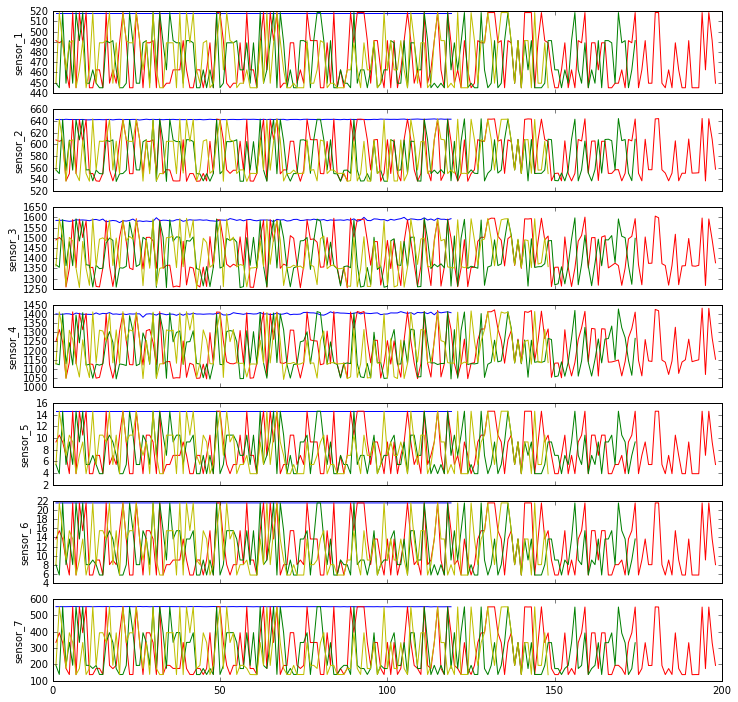

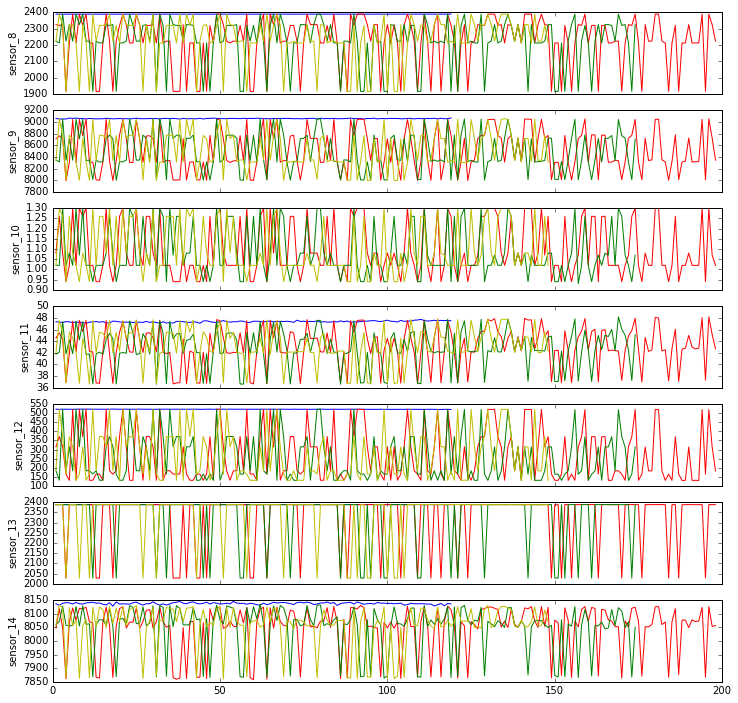

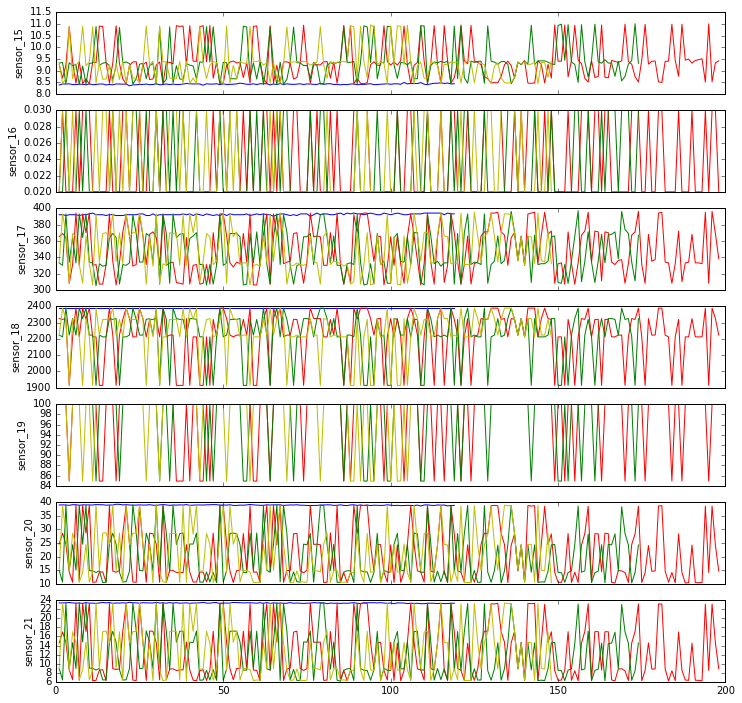

In [169]:
all_machines = all_dfs.unit.value_counts().index.tolist()
sample_machines = [random.choice(all_machines) for i in xrange(4)]
print sample_machines
sensors_time_series(all_dfs, sample_machines)

['87_train_FD001', '26_train_FD001', '19_train_FD001', '35_train_FD001']


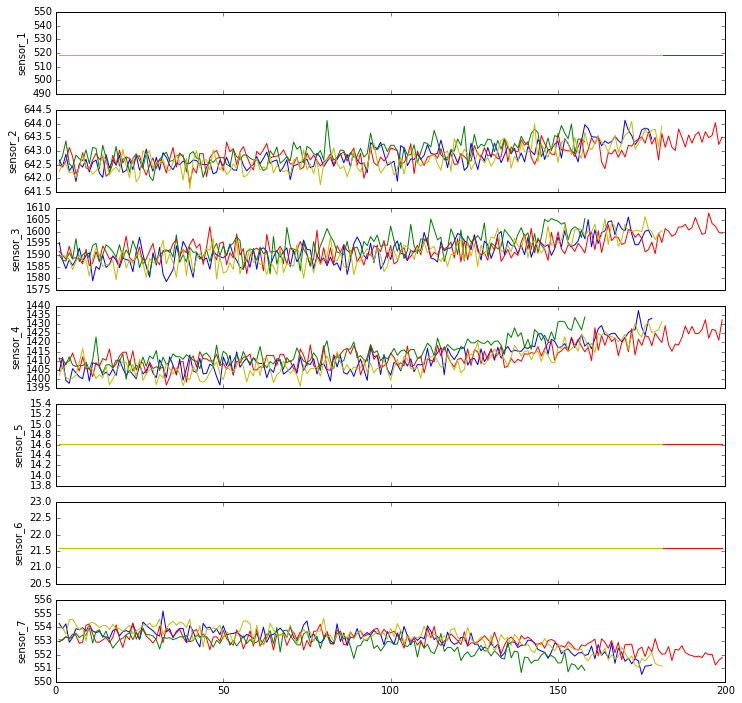

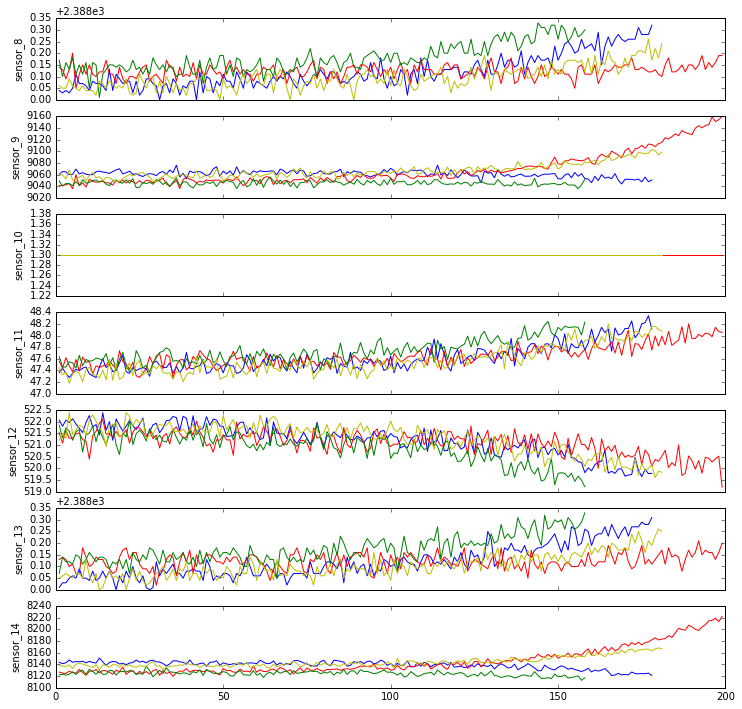

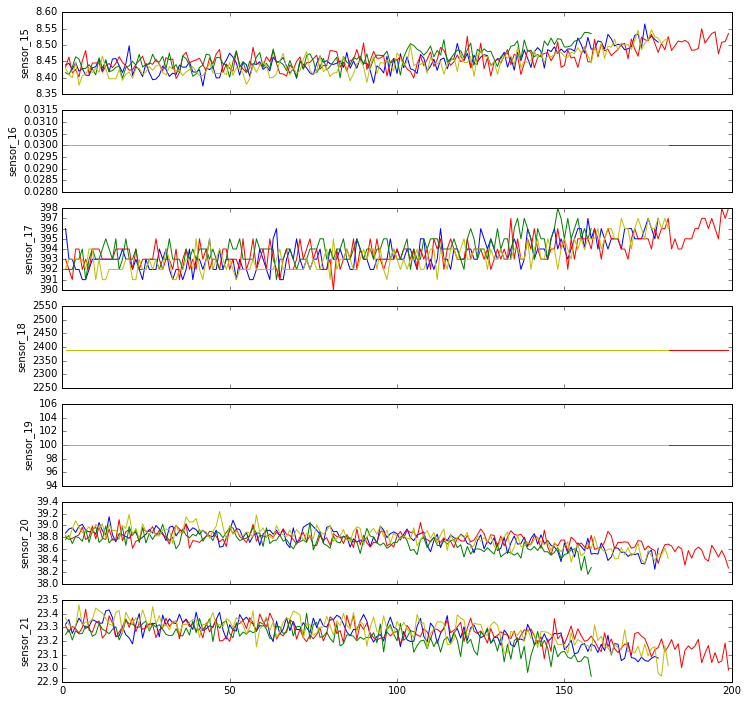

In [175]:
all_machines = dfs[0].unit.value_counts().index.tolist()
sample_machines = [random.choice(all_machines) for i in xrange(4)]
print sample_machines
sensors_time_series(dfs[0], sample_machines)

In [158]:
def generate_distribution_file(df, label):

    #group by functions to apply on all observational column in dataframe
    gb_functions = { 'OpSet1': ['mean', 'std'], 'OpSet2'  : ['mean', 'std'], 'OpSet3'  : ['mean', 'std'],  'SensorMeasure1': ['mean', 'count', 'std'], 'SensorMeasure2': ['mean', 'std'], 'SensorMeasure3'  : ['mean', 'std'], 'SensorMeasure4'  : ['mean', 'std'], \
    'SensorMeasure5'  : ['mean', 'std'], 'SensorMeasure6'  : ['mean', 'std'], 'SensorMeasure7'  : ['mean', 'std'], 'SensorMeasure8'  : ['mean', 'std'],  'SensorMeasure9'  : ['mean', 'std'], 'SensorMeasure10'  : ['mean', 'std'], 'SensorMeasure11'  : ['mean', 'std'], 'SensorMeasure12'  : ['mean', 'std'], \
    'SensorMeasure13'  : ['mean', 'std'], 'SensorMeasure14'  : ['mean', 'std'], 'SensorMeasure15'  : ['mean', 'std'], 'SensorMeasure16'  : ['mean', 'std'],  'SensorMeasure17'  : ['mean', 'std'], 'SensorMeasure18'  : ['mean', 'std'], 'SensorMeasure19'  : ['mean', 'std'], 'SensorMeasure20'  : ['mean', 'std'], 'SensorMeasure21'  : ['mean', 'std']}

    features = df.columns[2:].tolist()

    df_trends = df.groupby(['time']).agg(gb_functions)
    filename =  "fd_" + label + ".csv"
    with open(filename, 'w') as fp:
        feature_distribution = {}
        for time in xrange(1, len(df_trends)):
            for feature in features:
                std = df_trends[feature]["std"][time]
                if math.isnan(std):
                    std = 10
                feature_distribution[feature + "_" + str(time) + "_" + "mean"] = df_trends[feature]["mean"][time]
                feature_distribution[feature + "_" + str(time) + "_" + "std"] = abs(std)
                fp.write(feature + ',' + str(time) + ',' + str(df_trends[feature]["mean"][time]) + ',' + str(abs(std)) + '\n' )
    with open("feature_distribution_0.json", 'w') as f:
        json.dump(feature_distribution, f)
    return feature_distribution

In [160]:
fd = generate_distribution_file(dfs[0], "0")

In [161]:
with open("feature_distribution_0.json", 'w') as f:
    json.dump(fd, f)

In [164]:
df_fd = pd.read_csv('fd_0.csv')

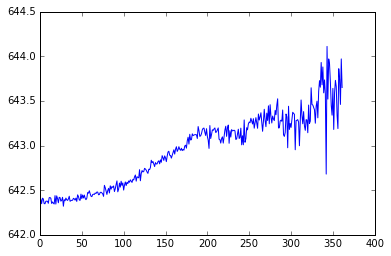

In [149]:
plt.plot(df_fd[df_fd['Sensor'] == "SensorMeasure7"]["Time"], df_fd[df_fd['Sensor'] == "SensorMeasure7"]["Mean"])

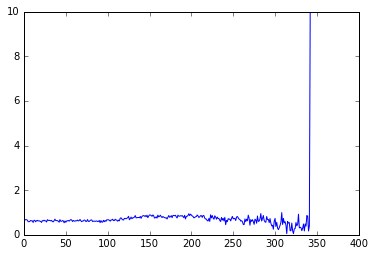

In [151]:
plt.plot(df_fd[df_fd['Sensor'] == "SensorMeasure7"]["Time"], df_fd[df_fd['Sensor'] == "SensorMeasure7"]["Std"])

In [167]:
df_fd[df_fd["Mean"] <0]

,Sensor,Time,Mean,Std
0,OpSet1,1,-5.900000e-05,0.002194
1,OpSet2,1,-2.000000e-06,0.000327
25,OpSet2,2,-5.963112e-21,0.000282
48,OpSet1,3,-2.040000e-04,0.001998
49,OpSet2,3,-5.900000e-05,0.000293
121,OpSet2,6,-1.900000e-05,0.000306
144,OpSet1,7,-1.530000e-04,0.002083
169,OpSet2,8,-2.400000e-05,0.000301
217,OpSet2,10,-5.600000e-05,0.000283
241,OpSet2,11,-2.500000e-05,0.000318
